In [10]:
#analyze the results

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


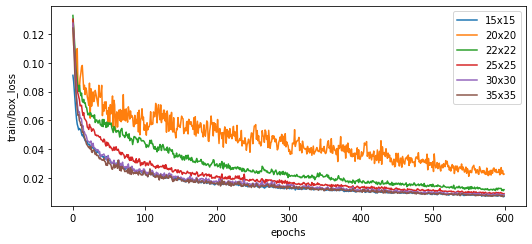

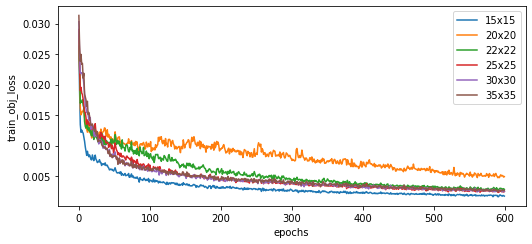

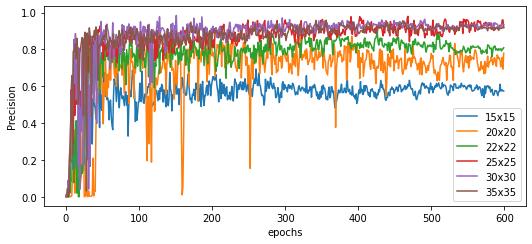

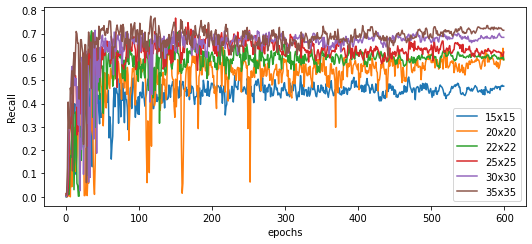

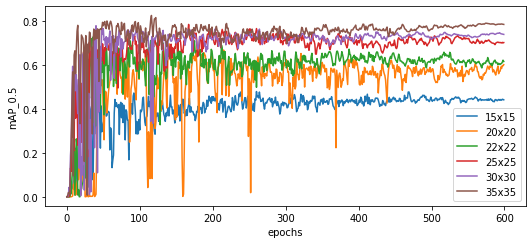

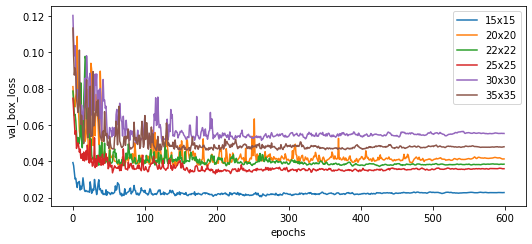

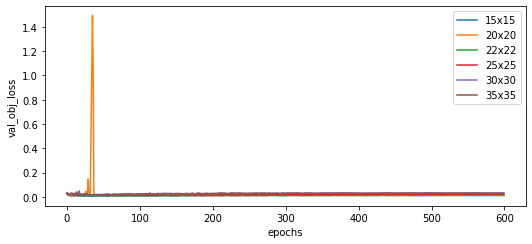

In [133]:
path0 = "C:\\Users\\fabri\\Desktop\\results\\train\\exp\\"
path1 = "C:\\Users\\fabri\\Desktop\\results\\train\\exp2\\"
path2 = "C:\\Users\\fabri\\Desktop\\results\\train\\exp3\\"
path3 = "C:\\Users\\fabri\\Desktop\\results\\train\\exp4\\"
path4 = "C:\\Users\\fabri\\Desktop\\results\\train\\exp5\\"
path5 = "C:\\Users\\fabri\\Desktop\\results\\train\\exp6\\"

path = [path0, path1, path2, path3, path4, path5]
save_path = "C:\\Users\\fabri\\Desktop\\results\\"
graph_label = ["15x15", "20x20", "22x22", "25x25", "30x30", "35x35"]

plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

headers = ['epoch','train/box_loss','train/obj_loss','train/cls_loss','metrics/precision','metrics/recall','metrics/mAP_0.5','metrics/mAP_0.5:0.95','val/box_loss','val/obj_loss','val/cls_loss','x/lr0','x/lr1','x/lr2'] 

for i in range(6):
    data = pd.read_csv(path[i] + "results.csv", names = headers)
    data = data.values
    

    df = []
    df = pd.DataFrame({'epoch': data[1:, 0],
                       'trainb_loss': data[1:, 1],
                       'trainobj_loss': data[1:, 2],
                       'precision': data[1:, 4],
                       'recall': data[1:, 5],
                       'mAP_0_5': data[1:, 6],
                       'valbloss': data[1:, 8],
                       'valobj_loss': data[1:, 9]})

    df.epoch=pd.to_numeric(df.epoch)
    df.trainb_loss=pd.to_numeric(df.trainb_loss)
    df.trainobj_loss=pd.to_numeric(df.trainobj_loss)
    df.precision=pd.to_numeric(df.precision)
    df.recall=pd.to_numeric(df.recall)
    df.mAP_0_5=pd.to_numeric(df.mAP_0_5)
    df.valbloss=pd.to_numeric(df.valbloss)
    df.valobj_loss=pd.to_numeric(df.valobj_loss)
    
    plt.figure(1)
    plt.plot(df['epoch'], df['trainb_loss'], label = graph_label[i])
    plt.xlabel("epochs")
    plt.ylabel('train/box_loss')
    plt.legend()        
    plt.savefig(save_path + 'trainb_loss' + str(i) + '.png')
    
    plt.figure(2)
    plt.plot(df['epoch'], df['trainobj_loss'], label = graph_label[i])
    plt.xlabel("epochs")
    plt.ylabel('train_obj_loss')
    plt.legend()
    plt.savefig(save_path + 'trainobj_loss' + str(i) + '.png')
    
    plt.figure(3)
    plt.plot(df['epoch'], df['precision'], label = graph_label[i])
    plt.xlabel("epochs")
    plt.ylabel('Precision')
    plt.legend()
    plt.savefig(save_path + 'precision' + str(i) + '.png')

    plt.figure(4)
    plt.plot(df['epoch'], df['recall'], label = graph_label[i])
    plt.xlabel("epochs")
    plt.ylabel('Recall')
    plt.legend()
    plt.savefig(save_path + 'recall' + str(i) + '.png')
    
    plt.figure(5)
    plt.plot(df['epoch'], df['mAP_0_5'], label = graph_label[i])
    plt.xlabel("epochs")
    plt.ylabel('mAP_0.5')
    plt.legend()
    plt.savefig(save_path + 'mAP_0_5' + str(i) + '.png')
    
    plt.figure(6)
    plt.plot(df['epoch'], df['valbloss'], label = graph_label[i])
    plt.xlabel("epochs")
    plt.ylabel('val_box_loss')
    plt.legend()
    plt.savefig(save_path + 'valbloss' + str(i) + '.png')
    
    plt.figure(7)
    plt.plot(df['epoch'], df['valobj_loss'], label = graph_label[i])
    plt.xlabel("epochs")
    plt.ylabel('val_obj_loss')
    plt.legend()
    plt.savefig(save_path + 'valobj_loss' + str(i) + '.png')
    #plt.show()

plt.show()
    


